In [20]:
from random import randrange
import chess

class Field():
    def __init__(self, x, y): # Schachnotation: A1, "x" dann "y"
        if 0 <= x <= 7 :
            self.x = x
        else:
            print("x must be between 0 and 7") # Das muss durch Exception ersetzt werden.
        if 0 <= y <= 7 :
            self.y = y
        else:
            print("y must be between 0 and 7") # dito
        
    def pychess_id(self): # 0o00 für A1, 0oO1 for B1 ... 0o10 für A2 ... 0o77 für H8
        return self.y * 0o10 + self.x
    
    def __hash__(self): # ist notwendig für set.
        return self.pychess_id()
    
    def __eq__(self, other): #== Operator. ist notwendig für set.
        if not isinstance(other, Field):
            return NotImplemented
        return self.pychess_id() == other.pychess_id()
        
class Queen():
    def __init__(self, x, y):
        self.f = Field(x, y)
        
    def controlled_fields(self):
        fields = {} # das ist ein Set. In einem Set sind die Elemente eindeutig. 
                    # Die Klasse muss __eq__ und __hash__ definieren. 
                    # https://docs.python.org/3.5/reference/datamodel.html#object.__hash__
        x = self.f.x
        y = self.f.y
        fields = {Field(x+i,y) for i in range(-x, 8-x)} #Horizontale
        fields = fields.union({Field(x,y+i) for i in range(-y, 8-y)}) #Vertikale
        fields = fields.union({Field(x+i,y+i) for i in range(max(-x,-y), min(8-x,8-y))}) #1. Diagonale
        fields = fields.union({Field(x-i,y+i) for i in range(max(x-7,-y), min(x+1, 7-y+1))})#2. Diagonale                               
        return fields

def queenproblem():
    queens=[]
    while len(queens) < 8:
        queens = []
        queens=[Queen(randrange(8),randrange(8))]
        free_fields = {Field(x,y) for x in range(0,8) for y in range(0,8)}
        free_fields.difference_update(queens[0].controlled_fields())
        for i in range(7):
            if len(free_fields) > 0: 
                ff = list(free_fields)[randrange(len(free_fields))]
                q = Queen(ff.x,ff.y)
                free_fields.difference_update(q.controlled_fields())
                queens.append(q) 
    return queens

Average time for Queen Problem: 0.004624254114038355


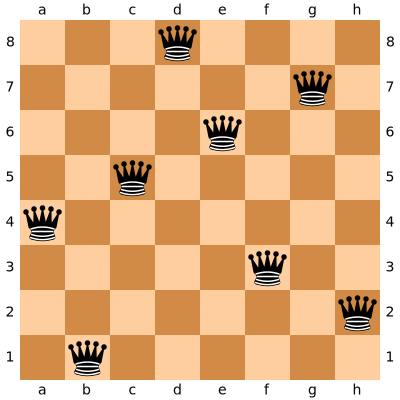

In [21]:
import time 
st = time.time()
for i in range(1000):
    qs = queenproblem()
et = time.time()
print("Average time for Queen Problem:", (et-st)/i)
board = chess.Board()    
board.clear_board()
for q in qs: 
    board.set_piece_at(q.f.pychess_id(), chess.Piece.from_symbol("q"))
board

# Vollständige Lösung aus Wikipedia mit allen 92 Lösungen

In [2]:
# Erzeuge eine Liste von Lösung auf einem Brett mit Reihen und Spalten.
# Eine Lösung wird durch eine Liste der Spaltenpositionen,
# indiziert durch die Reihennummer, angegeben.
# Die Indizes beginnen mit Null.

# AlexK [1;4] = a1; b4
#[1, 3, 5, 2] = a2; d2; a1; c2
# Die Funktion "damenproblem" nummeriert die Reihen ruckwärts: 
# Der erste Schritt beginnt mit Reihe Nr. 8 für 8+8 Brett. Durch die 
# Rekursion wird aber ein Stack First In, Last out aufgebaut.
# Wenn die tiefste Stelle (0te Reihe) erreicht wurde, dann beginnt die 
# Abarbeitung des Stacks. D.h. die Fkt "eine_dame_dazu" wird zuerst mit
# einer Reihen aufgerufen, dann mit zwei u.s.w. Somit werden Teillösungen
# des Problems gesucht. Bei jedem Aufruf wird die List "neue_loesungen" 
# neu aufgebaut. Wenn in die neue Reihe keine Dame hinzugefügt werden 
# kann, wird die alte Lösung nicht übernommen.
# Eine gute Erklärung zu rekursiven Aufrufen findet man hier:
# https://realpython.com/python-thinking-recursively/
def damenproblem(reihen, spalten):
    if reihen <= 0:
        return [[]] # keine Dame zu setzen; leeres Brett ist Lösung
    else:
       # AlexK Debug für bessere Verständlickeit.
       # print("Reihen=", reihen, " Spalten = ", spalten)
       # input() 
        return eine_dame_dazu(reihen - 1, spalten, damenproblem(reihen - 1, spalten))

# Probiere alle Spalten, in denen für eine gegebene Teillösung
# eine Dame in "neue_reihe" gestellt werden kann.
# Wenn kein Konflikt mit der Teillösung auftritt,
# ist eine neue Lösung des um eine Reihe erweiterten
# Bretts gefunden.
def eine_dame_dazu(neue_reihe, spalten, vorherige_loesungen):
    neue_loesungen = []
    for loesung in vorherige_loesungen:
        # Versuche, eine Dame in jeder Spalte von neue_reihe einzufügen.
        for neue_spalte in range(spalten):
            # print('Versuch: %s in Reihe %s' % (neue_spalte, neue_reihe))
            if kein_konflikt(neue_reihe, neue_spalte, loesung):
                # Kein Konflikte, also ist dieser Versuch eine Lösung.
                neue_loesungen.append(loesung + [neue_spalte])
    return neue_loesungen

# Kann eine Dame an die Position "neue_spalte"/"neue_reihe" gestellt werden,
# ohne dass sie eine der schon stehenden Damen schlagen kann?
def kein_konflikt(neue_reihe, neue_spalte, loesung):
    # Stelle sicher, dass die neue Dame mit keiner der existierenden
    # Damen auf einer Spalte oder Diagonalen steht.
    for reihe in range(neue_reihe):
        if (loesung[reihe]         == neue_spalte              or  # gleiche Spalte
            loesung[reihe] + reihe == neue_spalte + neue_reihe or  # gleiche Diagonale
            loesung[reihe] - reihe == neue_spalte - neue_reihe):   # gleiche Diagonale
                return False
    return True

size=4
for loesung in damenproblem(size, size):
    print(loesung)

[1, 3, 0, 2]
[2, 0, 3, 1]


### Veranschaulichung des Funktionsstacks am Beispeil der Fakultätsfunktion:

In [3]:
def fakultaet(n):
    #print(n)
    if n > 1:
        return n*fakultaet(n-1)
    else:
        return n

fakultaet(5)

120

![SegmentLocal](stack.9c4ba62929cf.gif"segment")

In [16]:
# lösung von Großmeister Niklaus Wirth
# n: Feldgröße
# a: Lösung
# 
# Umrechunung in Schachnotation: [0;3] = a1; d2

def tryout(n, neu_zeile, sol, b, c):
    print("sol= ",sol,"neu_zeile= ",neu_zeile, "b= ",b, "c= ", c)
    if neu_zeile < n:
        for spalte in range(n):
            if spalte not in sol and neu_zeile+spalte not in b and neu_zeile-spalte not in c:
                #sol+[spalte] anhängen von spalte an die Liste sol.
                for solution in tryout(n, neu_zeile+1, sol+[spalte], b+[neu_zeile+spalte], c+[neu_zeile-spalte]):  
                    print("solution=", solution)
                    yield solution
    else:
        yield sol

In [25]:
for solution in tryout(4, 0, [], [], []):
    print(solution)

sol=  [] neu_zeile=  0 b=  [] c=  []
sol=  [0] neu_zeile=  1 b=  [0] c=  [0]
sol=  [0, 2] neu_zeile=  2 b=  [0, 3] c=  [0, -1]
sol=  [0, 3] neu_zeile=  2 b=  [0, 4] c=  [0, -2]
sol=  [0, 3, 1] neu_zeile=  3 b=  [0, 4, 3] c=  [0, -2, 1]
sol=  [1] neu_zeile=  1 b=  [1] c=  [-1]
sol=  [1, 3] neu_zeile=  2 b=  [1, 4] c=  [-1, -2]
sol=  [1, 3, 0] neu_zeile=  3 b=  [1, 4, 2] c=  [-1, -2, 2]
sol=  [1, 3, 0, 2] neu_zeile=  4 b=  [1, 4, 2, 5] c=  [-1, -2, 2, 1]
solution= [1, 3, 0, 2]
solution= [1, 3, 0, 2]
solution= [1, 3, 0, 2]
solution= [1, 3, 0, 2]
[1, 3, 0, 2]
sol=  [2] neu_zeile=  1 b=  [2] c=  [-2]
sol=  [2, 0] neu_zeile=  2 b=  [2, 1] c=  [-2, 1]
sol=  [2, 0, 3] neu_zeile=  3 b=  [2, 1, 5] c=  [-2, 1, -1]
sol=  [2, 0, 3, 1] neu_zeile=  4 b=  [2, 1, 5, 4] c=  [-2, 1, -1, 2]
solution= [2, 0, 3, 1]
solution= [2, 0, 3, 1]
solution= [2, 0, 3, 1]
solution= [2, 0, 3, 1]
[2, 0, 3, 1]
sol=  [3] neu_zeile=  1 b=  [3] c=  [-3]
sol=  [3, 0] neu_zeile=  2 b=  [3, 1] c=  [-3, 1]
sol=  [3, 0, 2] neu_ze

In [48]:
def myfunk(a,b):
    if b < a:
        for i in myfunk(a,b+1):
            yield b*a
    else: yield 0

In [49]:
for i in myfunk(3,0):
    print(i)

0


In [11]:
erg=[]
erg.append([1]+[2])
erg.append([3]+[4])
erg

[[1, 2], [3, 4]]